In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from pyswarms.utils.functions.single_obj import sphere as f


import pyswarms.backend as P
from pyswarms.backend.topology import Star


import pyswarms as ps

import pandas as pd

In [23]:
pre_X_train = pd.read_csv('HW3_Training.csv', names=['0', '1', '2', '3' , '4', '5', '6'])
pre_X_test = pd.read_csv('HW3_Testing.csv', names=['0', '1', '2', '3' , '4', '5', '6'])

def txt_to_csv(txt):
    
    matrix_aux = []
    df_aux = {'0':[], '1':[], '2':[], '3':[], '4':[], '5':[], '6':[],}
    
    for row in txt.iloc[:,0]:
        matrix_aux.append(list(row))

    for row in matrix_aux:
        for i in range(len(row)):
            df_aux[list(df_aux.keys())[i]].append(row[i])
    
    return np.array(pd.DataFrame(df_aux)).reshape(21, 63)

def chars_to_nums(df):
    
    aux = []
    new_df = []
    
    for row in df:
        for char in row:
            if char == '#':
                aux.append(1)
            elif char == '@':
                aux.append(2)
            elif char == 'o':
                aux.append(3)
            else:
                aux.append(0)
        new_df.append(aux)
        aux = []
    return(np.array(new_df))

X = txt_to_csv(pre_X_train)
y = txt_to_csv(pre_X_test)

X = chars_to_nums(X)
y = chars_to_nums(y)

X_train = X
y_train = [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]
X_test = y
y_test = [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]

In [17]:
# Neural network architecture
n_inputs = 63
n_hidden = 20
n_classes = 7
    
# Forward propagation
def forward_prop(params):
   
    
    
    n_weights = n_inputs * n_hidden 
    n_weights_2 = n_weights + n_hidden + (n_hidden * n_classes)
    
    W1 = params[0:n_weights].reshape((n_inputs,n_hidden))
    b1 = params[n_weights : n_weights + n_hidden].reshape((n_hidden,))
    W2 = params[n_weights + n_hidden : n_weights_2].reshape((n_hidden,n_classes))
    b2 = params[n_weights_2 : n_weights_2 + n_classes].reshape((n_classes,))

    
    z1 = X.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2

    
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    
    N = 21 
    corect_logprobs = -np.log(probs[range(N), y_train])
    loss = np.sum(corect_logprobs) / N

    return loss

In [18]:
def f(x):

    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    return np.array(j)

In [19]:
my_topology = Star() # The Topology Class
my_options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9} # arbitrarily set
my_swarm = P.create_swarm(n_particles=100, dimensions=(n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes, options=my_options) # The Swarm Class

print('The following are the attributes of our swarm: {}'.format(my_swarm.__dict__.keys()))



The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])


In [20]:
costs_lists = []
def optimizing(f, iterations):

    for i in range(iterations):
        
        # Part 1: Update personal best
        my_swarm.current_cost = f(my_swarm.position) # Compute current cost
        
        my_swarm.pbest_cost = f(my_swarm.pbest_pos)  # Compute personal best pos
        my_swarm.pbest_pos, my_swarm.pbest_cost = P.compute_pbest(my_swarm) # Update and store
        
        # Part 2: Update global best
        if np.min(my_swarm.pbest_cost) < my_swarm.best_cost:
            my_swarm.best_pos, my_swarm.best_cost = my_topology.compute_gbest(my_swarm)
            
        
        costs_lists.append(my_swarm.best_cost)
        if i%20==0:
            print('Iteration: {} | my_swarm.best_cost: {:.4f}'.format(i+1, my_swarm.best_cost))

        # Part 3: Update position and velocity matrices
        my_swarm.velocity = my_topology.compute_velocity(my_swarm)
        my_swarm.position = my_topology.compute_position(my_swarm)
        
    print('The best cost found by our swarm is: {:.4f}'.format(my_swarm.best_cost))
    print('The best position found by our swarm is: {}'.format(my_swarm.best_pos))

In [21]:
optimizing(f, 100)

Iteration: 1 | my_swarm.best_cost: 2.0225
Iteration: 21 | my_swarm.best_cost: 0.9335
Iteration: 41 | my_swarm.best_cost: 0.4785
Iteration: 61 | my_swarm.best_cost: 0.3235
Iteration: 81 | my_swarm.best_cost: 0.2031
The best cost found by our swarm is: 0.0791
The best position found by our swarm is: [-0.25156951  0.85023243 -0.42052798 ...  1.22182606 -0.53817666
 -0.02255316]


In [287]:
optimizing(f, 10000)

Iteration: 1 | my_swarm.best_cost: 2.0710
Iteration: 21 | my_swarm.best_cost: 1.2993
Iteration: 41 | my_swarm.best_cost: 0.7950
Iteration: 61 | my_swarm.best_cost: 0.3296
Iteration: 81 | my_swarm.best_cost: 0.0677
Iteration: 101 | my_swarm.best_cost: 0.0117
Iteration: 121 | my_swarm.best_cost: 0.0029
Iteration: 141 | my_swarm.best_cost: 0.0007
Iteration: 161 | my_swarm.best_cost: 0.0002
Iteration: 181 | my_swarm.best_cost: 0.0001
Iteration: 201 | my_swarm.best_cost: 0.0001
Iteration: 221 | my_swarm.best_cost: 0.0001
Iteration: 241 | my_swarm.best_cost: 0.0001
Iteration: 261 | my_swarm.best_cost: 0.0000
Iteration: 281 | my_swarm.best_cost: 0.0000
Iteration: 301 | my_swarm.best_cost: 0.0000
Iteration: 321 | my_swarm.best_cost: 0.0000
Iteration: 341 | my_swarm.best_cost: 0.0000
Iteration: 361 | my_swarm.best_cost: 0.0000
Iteration: 381 | my_swarm.best_cost: 0.0000
Iteration: 401 | my_swarm.best_cost: 0.0000
Iteration: 421 | my_swarm.best_cost: 0.0000
Iteration: 441 | my_swarm.best_cost: 0

Iteration: 7301 | my_swarm.best_cost: 0.0000
Iteration: 7321 | my_swarm.best_cost: 0.0000
Iteration: 7341 | my_swarm.best_cost: 0.0000
Iteration: 7361 | my_swarm.best_cost: 0.0000
Iteration: 7381 | my_swarm.best_cost: 0.0000
Iteration: 7401 | my_swarm.best_cost: 0.0000
Iteration: 7421 | my_swarm.best_cost: 0.0000
Iteration: 7441 | my_swarm.best_cost: 0.0000
Iteration: 7461 | my_swarm.best_cost: 0.0000
Iteration: 7481 | my_swarm.best_cost: 0.0000
Iteration: 7501 | my_swarm.best_cost: 0.0000
Iteration: 7521 | my_swarm.best_cost: 0.0000
Iteration: 7541 | my_swarm.best_cost: 0.0000
Iteration: 7561 | my_swarm.best_cost: 0.0000
Iteration: 7581 | my_swarm.best_cost: 0.0000
Iteration: 7601 | my_swarm.best_cost: 0.0000
Iteration: 7621 | my_swarm.best_cost: 0.0000
Iteration: 7641 | my_swarm.best_cost: 0.0000
Iteration: 7661 | my_swarm.best_cost: 0.0000
Iteration: 7681 | my_swarm.best_cost: 0.0000
Iteration: 7701 | my_swarm.best_cost: 0.0000
Iteration: 7721 | my_swarm.best_cost: 0.0000
Iteration:

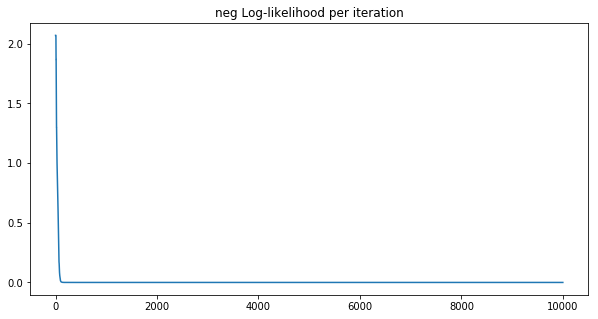

In [290]:
plt.figure(figsize=(10, 5))
plt.title('neg Log-likelihood per iteration')
plt.plot(range(10000), costs_lists)
plt.show()

In [ ]:
def predict(X, pos):
    """
    Use the trained weights to perform class predictions.

    Inputs
    ------
    X: numpy.ndarray
        Input Iris dataset
    pos: numpy.ndarray
        Position matrix found by the swarm. Will be rolled
        into weights and biases.
    """
    # Neural network architecture
    n_inputs = 63
    n_hidden = 20
    n_classes = 7

    # Roll-back the weights and biases
    W1 = pos[0:1260].reshape((n_inputs,n_hidden))
    b1 = pos[1260:1280].reshape((n_hidden,))
    W2 = pos[1280:1420].reshape((n_hidden,n_classes))
    b2 = pos[1420:1427].reshape((n_classes,))

    # Perform forward propagation
    z1 = X.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1
    z2 = a1.dot(W2) + b2 # Pre-activation in Layer 2
    logits = z2          # Logits for Layer 2
    
    print(logits)
    y_pred = np.argmax(logits, axis=1)
    print(y_pred)
    return y_pred

In [289]:
(predict(X_test, my_swarm.best_pos) == y_test).mean()

[[ 21.66336645  -1.88263637  -3.34268303   8.43783777 -25.10709994
    5.24937517  -4.61515082]
 [-18.21021662   8.44283842   5.96508498  -5.1542776   -4.49052195
   -6.76371467  -9.41755438]
 [ -7.56545531   0.7808508   10.83959303  -6.71269018 -20.9207307
    4.30790101  -2.61335627]
 [  6.27657156   6.03022805  -1.07490041  11.35039365 -22.65974731
   -0.21935775  -7.00001968]
 [ -9.35066039  -4.68821268  -3.88400678 -13.21160555  15.48923339
   -7.004939    -1.77284475]
 [-11.72602456  -3.68164231  -0.03657424  -3.3046614  -19.81262545
   12.09190251  -5.69335326]
 [-12.13434968  -1.26267067 -14.31562226  -7.3409904   -6.45963414
    1.24496566   6.5891647 ]
 [ 16.44944798  -4.15136198  -3.23250769   6.77510497  11.13319024
   -3.18064517  -5.54169673]
 [ -3.76244601  -0.91897292   0.44598105  -7.5502749   11.23749438
   -1.76720243  -0.41836241]
 [  3.86009285  -6.16153277   9.29163107  12.91042876  -0.81705473
   -1.09190079  -4.31871202]
 [ -2.54315382  -0.81525891   3.96910294 

0.8571428571428571